In [84]:
# The code was removed by Watson Studio for sharing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:

body = client_49f8ea1b1ced475385dd4b5547729aa1.get_object(Bucket='kaggle-donotdelete-pr-tsmvxbizgouvbt',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_1 = pd.read_csv(body,delimiter=None,index_col=None)
df_data_1.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
#This is for the titanic dataset 
"""This dataset used to predict the survival of the pasenger"""
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import style

import seaborn as sns

from  sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [87]:
from sklearn.model_selection import cross_val_score , GridSearchCV , cross_val_predict

from sklearn.metrics import confusion_matrix , precision_score  , recall_score

from sklearn.metrics import f1_score , precision_recall_curve  , roc_curve , roc_auc_score

In [88]:
train = df_data_0
test = df_data_1

In [89]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [92]:
train.info()
print('_'*40)
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
total =train.isnull().sum().sort_values(ascending=False)

percent_1 = train.isnull().sum()/train.isnull().count()*100

percent_2 = (round(percent_1,1)).sort_values(ascending=False)

missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])

missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


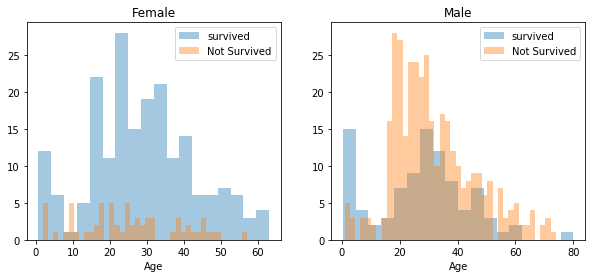

In [94]:
survived = 'survived'

not_survived = 'Not Survived'

fig , axes = plt.subplots(nrows = 1 , ncols = 2 , figsize = (10,4) )

woman = train[train['Sex'] =='female' ]

men = train[train['Sex'] == 'male' ]

#PLOT FOR SRURVIVAL IN WOMAN

ax = sns.distplot(woman[woman['Survived'] == 1 ].Age.dropna(),bins=18,label = survived , ax = axes[0],kde = False )

ax = sns.distplot(woman[woman['Survived'] == 0 ].Age.dropna(),bins=40,label=not_survived,ax=axes[0],kde = False)

ax.legend()

ax.set_title('Female')


#PLOT FOR SURVIVAL IN MEN

ax = sns.distplot(men[men['Survived'] == 1 ].Age.dropna(),bins=18,label = survived , ax = axes [1] , kde = False)

ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(),bins=40 , label = not_survived , ax = axes [1] , kde =False)

ax.legend()

_=ax.set_title('Male')

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


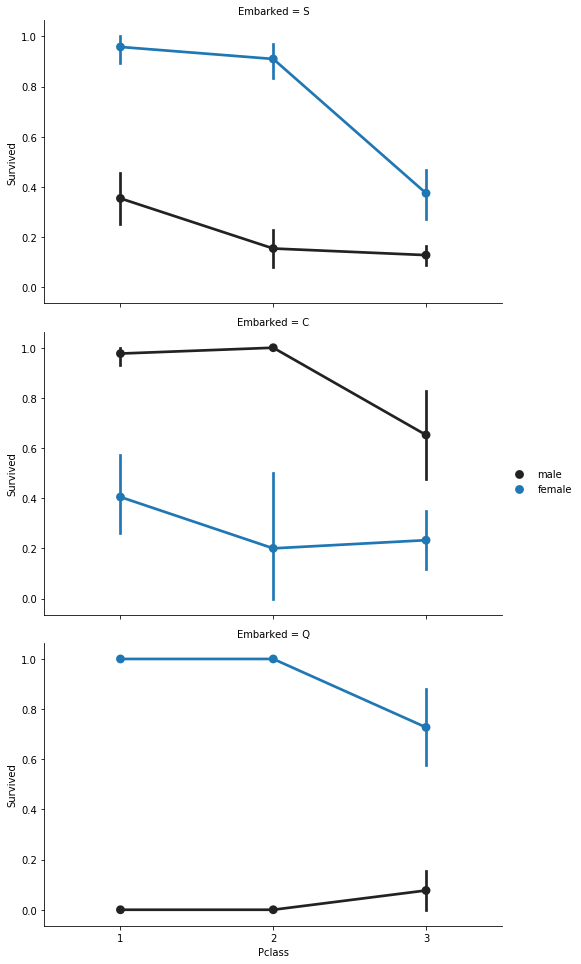

In [95]:
face = sns.FacetGrid( train , row='Embarked' , size=4.5 , aspect =1.6  )

face.map(sns.pointplot , 'Pclass' , 'Survived' , 'Sex' , palette = None , order = None, hue_order =  None )

face.add_legend()


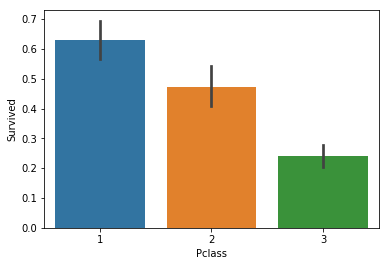

In [96]:
sns.barplot(x='Pclass',y='Survived',data = train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


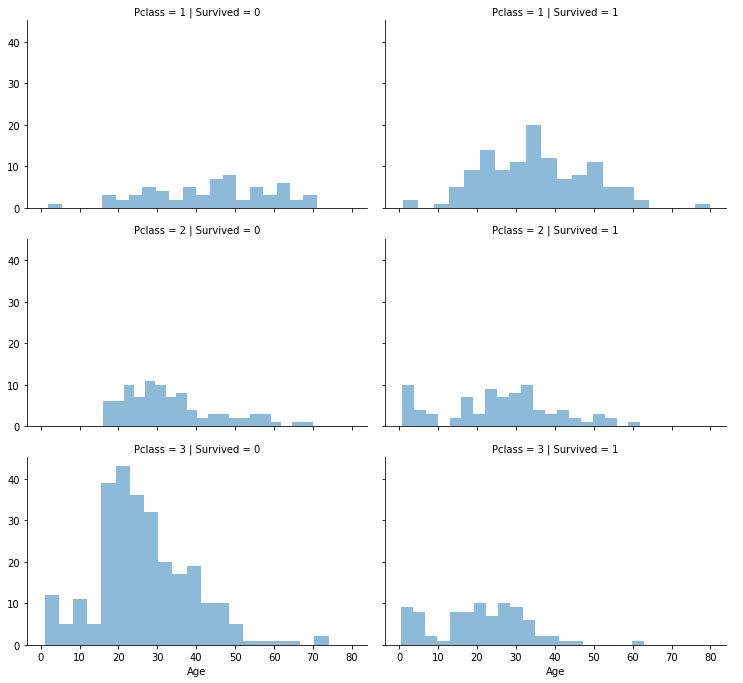

In [97]:
face_grid = sns.FacetGrid(train , col='Survived' , row = 'Pclass' , size = 3.2 , aspect = 1.6 )
face_grid.map(plt.hist,'Age',alpha = .5 , bins = 20)
face_grid.add_legend()

In [119]:
combine = [train, test]
for data in combine:
    data['relatives'] = data['SibSp'] + data['Parch']
    data.loc[data['relatives'] > 0, 'not_alone'] = 0 
    data.loc[data['relatives'] == 0, 'not_alone'] = 1
    data['not_alone'] = data['not_alone'].astype(int)
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


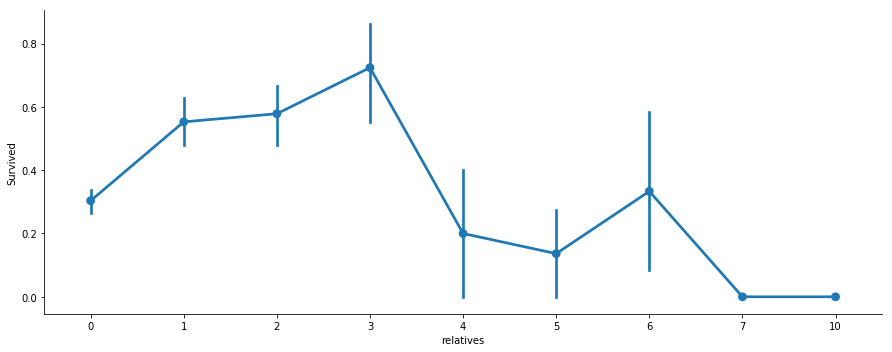

In [99]:
axes = sns.factorplot('relatives','Survived',data=train,aspect=2.5)

In [100]:
train = train.drop(['PassengerId'], axis=1)

In [101]:
import re
deck = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}

data = [train,test]

for file  in data :
    file['Cabin'] = file['Cabin'].fillna("U0")
    file['Deck']  = file['Cabin'].map(lambda X : re.compile("([a-zA-Z]+)").search(X).group())
    file['Deck'] = file['Deck'].map(deck)
    file['Deck'] = file['Deck'].fillna(0)
    file['Deck'] = file['Deck'].astype(int)
    
train = train.drop(['Cabin'], axis = 1)
test  = test.drop(['Cabin'] , axis = 1)


In [102]:
age_data = [train,test]

for dataset in age_data :
    mean = train["Age"].mean()
    std  = train["Age"].std()
    null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std , mean + std , size = null)
    
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
train["Age"].isnull().sum()

0

In [103]:
#EMBARKED
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [120]:
#FILLING WITH COMMON VALUE

common = 'S'
data = [train,test]

for comb in data:
    comb['Embarked'] = comb['Embarked'].fillna(common)

In [105]:
#FARE 
#CONVERTING FARE
for fare in data:
    fare['Fare'] = fare['Fare'].fillna(0)
    fare['Fare'] = fare['Fare'].astype(int)
    

In [106]:
#NAME
title = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

for fited in data :
    fited['Title'] = fited.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
    fited['Title'] = fited['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    
    fited['Title'] = fited['Title'].replace('Mlle','Miss')
    
    fited['Title'] = fited['Title'].replace('Ms','Miss')
    
    fited['Title'] = fited['Title'].replace('Mme','Mrs')
    
    fited['Title'] = fited['Title'].map(title)
    
    fited['Title'] = fited['Title'].fillna(0)
    
train = train.drop(['Name'],axis=1)
test = test.drop(['Name'],axis=1)

In [121]:
gender = {"male" : 0 , "female" : 1}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [108]:
train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [109]:
train = train.drop(['Ticket'],axis = 1 )

test = test.drop(['Ticket'],axis = 1)

In [122]:
ports = {"S" : 0 , "C" : 1 , "Q" : 2}

for deep in data:
    deep['Embarked'] = deep["Embarked"].map(ports)

In [123]:
#CREATE CATEGORIES
data = [train ,test ]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11 , 'Age' ] = 0
    dataset.loc[(dataset['Age'] > 11 )  & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18 )  & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22 ) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27 )  & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33 )  & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40 )  & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66 , 'Age'] = 6
    
train['Age'].value_counts()

0    891
Name: Age, dtype: int64

In [124]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_per_person
0,0,3,0,0,1,0,0,0,1,0,8,1,6,0
1,1,1,1,0,1,0,3,1,1,0,3,3,5,1
2,1,3,1,0,0,0,0,0,0,1,8,2,9,0
3,1,1,1,0,1,0,3,0,1,0,3,3,5,1
4,0,3,0,0,0,0,1,0,0,1,8,1,15,1
5,0,3,0,0,0,0,1,2,0,1,8,1,15,1
6,0,1,0,0,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,0,0,2,1,0,2,0,8,3,9,0
9,1,2,1,0,1,0,2,1,1,0,8,3,2,1


In [125]:
data = [train,test]
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91 , 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91)  & (dataset['Fare'] <= 14.454) , 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare' ] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99 ) & (dataset['Fare'] <=250),'Fare'] = 4
    dataset.loc[dataset['Fare'] > 250 , 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
                

In [126]:
#creating new feature Age_Class

for datas in data:
    datas['Age_Class'] = datas['Age']*datas['Pclass']

In [127]:
#fare per person
for that in data:
    that['Fare_per_person'] = that['Fare'] / (that['relatives'] + 1)
    that['Fare_per_person'] = that["Fare_per_person"].astype(int)

In [128]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_per_person
0,0,3,0,0,1,0,0,0,1,0,8,1,0,0
1,1,1,1,0,1,0,0,1,1,0,3,3,0,0
2,1,3,1,0,0,0,0,0,0,1,8,2,0,0
3,1,1,1,0,1,0,0,0,1,0,3,3,0,0
4,0,3,0,0,0,0,0,0,0,1,8,1,0,0
5,0,3,0,0,0,0,0,2,0,1,8,1,0,0
6,0,1,0,0,0,0,0,0,0,1,5,1,0,0
7,0,3,0,0,3,1,0,0,4,0,8,4,0,0
8,1,3,1,0,0,2,0,0,2,0,8,3,0,0
9,1,2,1,0,1,0,0,1,1,0,8,3,0,0


In [129]:
#MODEL CREARTION

x_train = train.drop("Survived" , axis =1)

y_train = train["Survived"]

x_test  = test.drop("PassengerId" , axis=1).copy()

In [130]:
#LOGISTIC REGRESSION
log = LogisticRegression()
log.fit(x_train,y_train)
y_pre = log.predict(x_test)
acc_log = round(log.score(x_train,y_train)*100,2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [131]:
#STOCHASTIC GRADIENT DESCENT

sgd = SGDClassifier(max_iter = 5 , tol = None)

sgd.fit(x_train , y_train)

y_pred = sgd.predict(x_test)

sgd.score(x_train,y_train)

acc_sgd = round(sgd.score(x_train , y_train)*100,2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [132]:
acc_sgd

73.85

In [133]:
#Random forest 

random = RandomForestClassifier(n_estimators = 100)

random.fit(x_train , y_train)

y_predict = random.predict(x_test)

random.score(x_train,y_train)

acc_random = round(random.score(x_train,y_train)*100,2)


In [134]:
acc_random

87.65

In [135]:
#cross validation of random forest

rf = RandomForestClassifier(n_estimators = 100)

scores = cross_val_score(rf , x_train , y_train , cv=10 , scoring = "accuracy")

print("scores",scores)

print("Mean",scores.mean())
print("standard_deviation",scores.std())

scores [0.75555556 0.81111111 0.78651685 0.84269663 0.84269663 0.82022472
 0.82022472 0.74157303 0.83146067 0.86363636]
Mean 0.8115696288729997
standard_deviation 0.03722788140709106


In [136]:
important = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random.feature_importances_,3)})

important = important.sort_values('importance',ascending=False).set_index('feature')

important.head(15)

,importance
feature,
Title,0.269
Sex,0.234
Deck,0.137
Pclass,0.119
relatives,0.072
Embarked,0.062
SibSp,0.052
Parch,0.039
not_alone,0.016


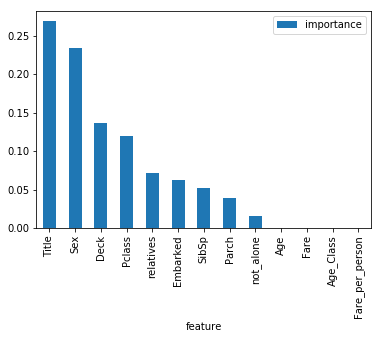

In [137]:
important.plot.bar()

In [138]:
#drop parch and no_alone

train = train.drop("not_alone",axis= 1)

test = test.drop("not_alone",axis= 1)

train = train.drop("Parch",axis = 1)

test = test.drop("Parch",axis = 1)

In [139]:
#training random forest again

random_forest = RandomForestClassifier(n_estimators = 100 , oob_score = True)

random_forest.fit(x_train,y_train)

y_predict = random_forest.predict(x_test)

random_forest.score(x_train,y_train)

acc_random_forest = round(random_forest.score(x_train,y_train)*100,2)

print(round(acc_random_forest,2),"%")


87.65 %


In [140]:
print("oob score:",round(random_forest.oob_score_,4)*100,"%")

oob score: 80.81 %


param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
#from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(x_train, y_train)
clf.bestparams


###  HYPERPARAMETER TURNING

In [141]:
random_for = RandomForestClassifier(criterion = 'gini',
                                   min_samples_leaf = 1,
                                   min_samples_split = 10,
                                   n_estimators = 100,
                                   max_features = 'auto',
                                   oob_score = True,
                                   random_state = 1,
                                   n_jobs =-1)
random_for.fit(x_train,y_train)

y_predict = random_for.predict(x_test)

random_for.score(x_train,y_train)

print("oob score:", round(random_for.oob_score_,4)*100,"%")

oob score: 82.15 %


#### EVALUATION

In [142]:
prediction = cross_val_predict(random_for , x_train,y_train,cv=3)
confusion_matrix(y_train,prediction)

array([[489,  60],
       [ 99, 243]])

In [143]:
print("precision:",precision_score(y_train,prediction))
print("recall:",recall_score(y_train,prediction))

precision: 0.801980198019802
recall: 0.7105263157894737


In [144]:
f1_score(y_train,prediction)

0.7534883720930233

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upper right ". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


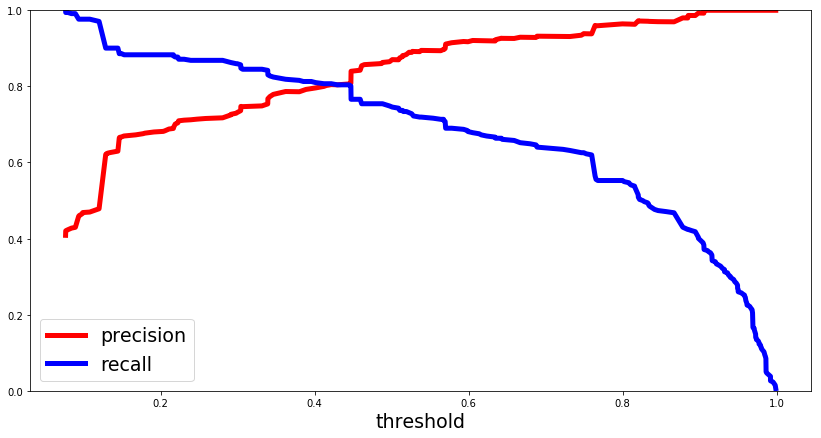

In [150]:
y_score = random_for.predict_proba(x_train)

y_score = y_score[:,1]

precision , recall , threshold = precision_recall_curve(y_train,y_score)

def plot_precision_and_recall(precision , recall , threshold):
    plt.plot(threshold , precision[:-1],"r-",label = "precision",linewidth=5)
    plt.plot(threshold , recall[:-1],"b",label = "recall",linewidth  = 5 ) 
    plt.xlabel("threshold",fontsize = 19 )
    plt.legend(loc = "upper right ",fontsize=19)
    plt.ylim([0,1])
    
plt.figure(figsize=(14,7))
plot_precision_and_recall(precision , recall,threshold)
plt.show()

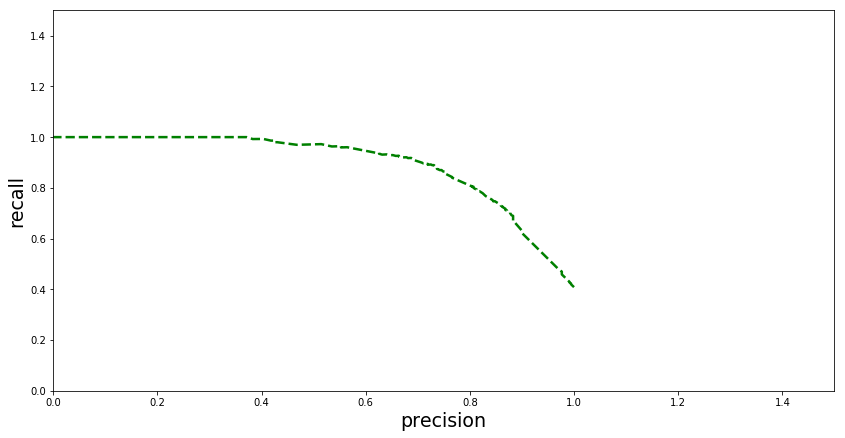

In [153]:
def plot_precision_vs_recall(precision,recall):
    plt.plot(recall,precision,"g--",linewidth=2.5)
    plt.ylabel("recall",fontsize=19)
    plt.xlabel("precision",fontsize=19)
    plt.axis([0,1.5,0,1.5])
    
plt.figure(figsize = (14,7))
plot_precision_vs_recall(precision , recall)
plt.show()

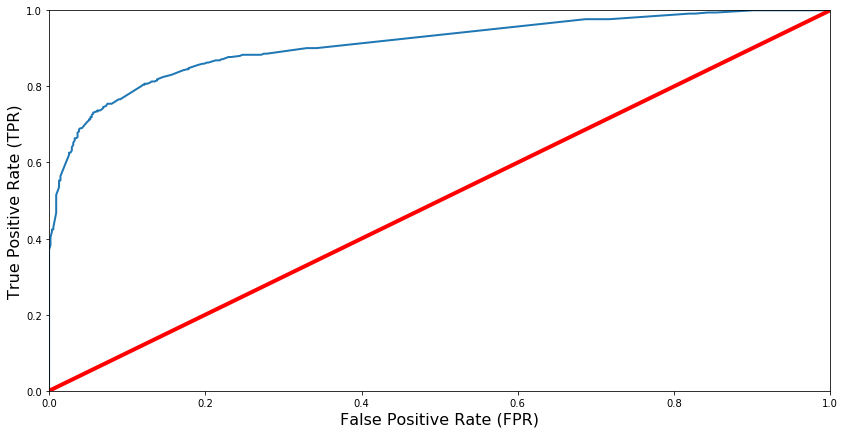

In [156]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_score)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [157]:
r_a_score = roc_auc_score(y_train,y_score)

print("roc-auc-score:",r_a_score)

roc-auc-score: 0.909391344177079


In [172]:
submission = pd.DataFrame({ "PassengerId":test["PassengerId"],
                          "Survived": y_predict})

In [185]:
submission.to_csv('submission.csv')